Calibration of the optical lattice depth
====
$$
\def\bra#1{\mathinner{\left\langle{#1}\right|}}
\def\ket#1{\mathinner{\left|{#1}\right\rangle}}
\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}
$$
The initial state of an atom should be $\ket{\Psi(t<0)} = \ket{k=0}$ as the momentum distribution of a BEC has a very sharp peak at $k=0$. A BEC suddenly loaded into a lattice can be described as superposition of Bloch states $\ket{k,n}$:
\begin{equation}
\ket{\Psi(t=0)} = \sum_{n=0}^{\infty} \ket{q,n} \braket{q,n}{ k=0}.   \\
\end{equation}
Recalling 
\begin{equation}
\ket{q,n} = \sum_{m=0,\pm 1, \cdots} A_{m}^{q,n} \ket{q+m K}, \\
\end{equation}
we get
\begin{equation}
\braket{q,n}{k=0} = (A_{m=0}^{q=0,n})^{\ast}.
\end{equation}
Then, while the BEC wavepacket is held in the lattice, it evolves in time according to
\begin{equation}
\ket{\Psi(t)} = \sum_{n=0}^{\infty} (A_{m=0}^{q=0,n})^{\ast} {\rm{exp}} \left( -i \frac{E_{q,n}}{\hbar} t \right) \ket{q,n}. \\
\end{equation}
Projecting the above onto the plane-wave basis, we obtain the coefficients $B_{m}^{q}$ of each $\ket{q+mK}$ in the lattice frame:
\begin{equation}
B_{m}^{q} = \sum_{n=0}^{\infty} (A_{l=0}^{q'=0,n})^{\ast} A_{m}^{q}  \left( -i \frac{E_{q,n}}{\hbar} t \right) . \\
\end{equation}
$q$ is a parameter, but usually chosen to zero as momentum of a BEC does not change during pulsed lattice.

Parameters
===

In [1]:
import numpy as np
lambda_L = 810*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 87Rb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of 1064nm lattice

angle = 18 # relative angle between two beams [degree]
theta = angle*np.pi/180
d_d = lambda_L / (2*np.sin(theta/2)) # lattice constant of diagonal lattice [m]
er_d = h_bar**2*np.pi**2/(2*mrb*d_d**2) #Recoil energy of diagonal lattice

n = 100
m = 20

#potential depth in definition of Er (not Er_d)
s_d_s = 0
s_d_e =30
s_d_num = 100

s_d_list = np.linspace(s_d_s, s_d_e,s_d_num) #potential depth in definition of Er (not Er_d)

s_list = s_d_list*er_d/er

# t_pulse = 62.35*10**(-6) #pulse time[s]
# t_pulse =5*10**(-6) #pulse time[s]
t_pulse = 1107.40*10**(-6) #pulse time[s]


Hamiltonian
===

In [2]:
Nsite = 2*n+1
H = np.zeros([Nsite, Nsite])

q = np.array([0])
E = np.zeros([q.size, Nsite])
tmp = np.eye(Nsite-1)
Htmp = np.zeros([Nsite, Nsite])
Htmp[0:Nsite-1, 1:Nsite] += np.multiply(-1/4 ,tmp)
Htmp[1:Nsite, 0:Nsite-1] += np.multiply(-1/4 ,tmp)

Time evolution according to Schrodinger eq.
---

In [3]:
m_list = [0,1,-1,2,-2]
pm = np.zeros([len(s_list),len(m_list)])

for i_s, s_temp in enumerate(s_d_list):
    Htmp = np.zeros([Nsite, Nsite])
    Htmp[0:Nsite-1, 1:Nsite] += -s_temp/4*tmp
    Htmp[1:Nsite, 0:Nsite-1] += -s_temp/4*tmp
    for i_q in range(q.size):
        H = np.copy(Htmp)
        for i in range(Nsite):
            H[i][i] = (2*(i-(Nsite-1)/2) + q[i_q])**2 +s_temp/2
        E0, P = np.linalg.eig(H)
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        E[i_q, :], tmp1 = map(list, zip(*rearrangedEvalsVecs))
    for i_m, mp in enumerate(m_list):
        pm[i_s,i_m] =np.abs(np.sum(P[n+mp,:]*P[n,:]*np.exp(-1.j*E0*er_d/h_bar*t_pulse)))**2 

Plot results
===

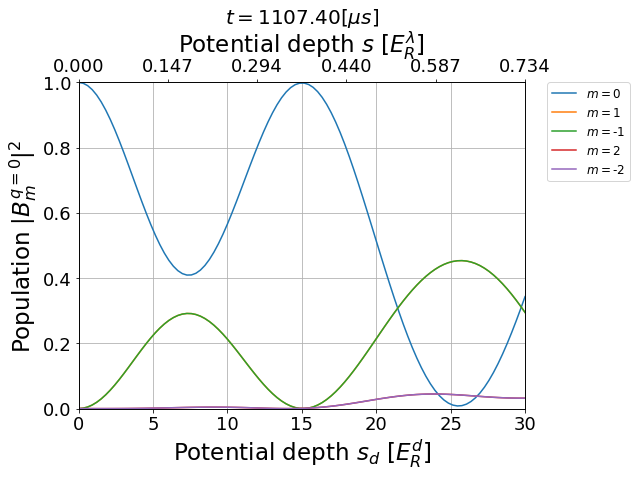

In [6]:
import matplotlib.pyplot as plt

new_tick_locations = s_d_list[s_d_num-1]*np.array([0,0.2,0.4,0.6,0.8,1])
def tick_function(X):
    V =X*er_d/er
    return ["%.3f" % z for z in V]

pulse_label = '{:.2f}'.format(t_pulse*10**6)

fig, ax1 = plt.subplots(figsize=[8,6])
ax2 = ax1.twiny()
list(map(lambda x: ax1.plot(s_d_list,pm[:,x],label=r"$m=$"+str(m_list[x])), range(len(m_list))))
ax1.set_xlim(min(s_d_list),max(s_d_list))
ax1.set_ylim(0,1)
ax1.set_xlabel(r'Potential depth $s_d$ [$E_R^{d}$]', fontsize=23)
ax1.set_ylabel(r'Population $|B_{m}^{q=0}|^2$', fontsize=23)
ax1.tick_params(axis='x',labelsize=18)
ax1.tick_params(axis='y',labelsize=18)
ax1.set_title(r'$t=$'+pulse_label+r'$[\mu s] $' , fontsize=20)
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations),fontsize=18)
ax2.set_xlabel(r'Potential depth $s$ [$E_R^{\lambda}$]', fontsize=23)
lg=ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax1.grid()

# pulse_label = '{:.2f}'.format(t_pulse*10**6)
# plt.figure(figsize=[8,6])
# list(map(lambda x: plt.plot(s_list,pm[:,x],label=r"$m=$"+str(m_list[x])), range(len(m_list))))
# plt.xlim(min(s_list),max(s_list))
# plt.ylim(0,1)
# plt.xlabel(r'Potential depth $s$ [$E_R^{\lambda}$]', fontsize=24)
# plt.ylabel(r'Population $|B_{m}^{q=0}|^2$', fontsize=24)
# plt.xticks(fontsize="20")
# plt.yticks(fontsize="20")
# plt.title(r'$t=$'+pulse_label+r'$[\mu s] $' , fontsize=20)
# plt.xticks(new_tick_locations, tick_function(new_tick_locations))
# # list(map(lambda x: plt.axvline(x=1/gap[x]*10**6, label=gap_name_list[x],c=colorlist[x],linestyle='--') , range(len(band_index_list))))
# lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
# lg.get_title().set_fontsize(15)
# plt.grid()

In [5]:
er/er_d

40.8634581890614